In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [2]:
import pandas as pd
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.Outcome.unique()

array([1, 0])

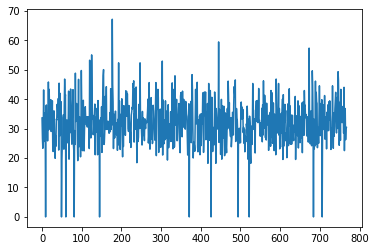

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot("BMI",data=diabetes)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


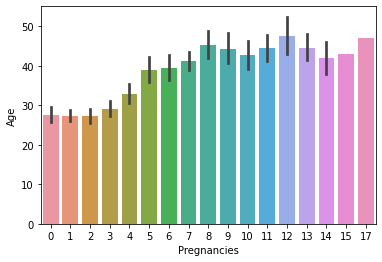

In [5]:
sns.barplot("Pregnancies","Age",data=diabetes)
plt.show()

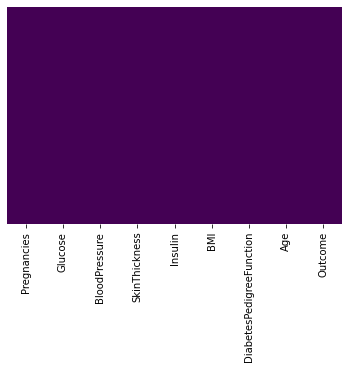

In [6]:
sns.heatmap(diabetes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


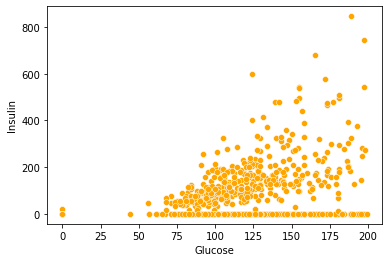

In [7]:
sns.scatterplot("Glucose","Insulin",data=diabetes,color='orange')

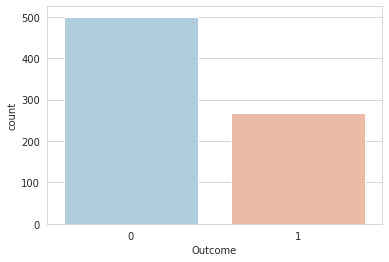

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=diabetes,palette='RdBu_r')

In [9]:
X=diabetes.drop("Outcome",axis=1)
y=diabetes['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.22,random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [14]:
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=45,activation='relu'))
model.add(Dense(units=69,activation='elu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/200
19/19 [==============================] - 0s 9ms/step - loss: 0.6742 - val_loss: 0.6500
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6474 - val_loss: 0.6251
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6220 - val_loss: 0.5819
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5909 - val_loss: 0.5366
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5660 - val_loss: 0.5254
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5371 - val_loss: 0.4727
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5278 - val_loss: 0.4646
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5045 - val_loss: 0.4471
Epoch 9/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4865 - val_loss: 0.4602
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4880 - val_loss: 0.4289
Epoch 11/

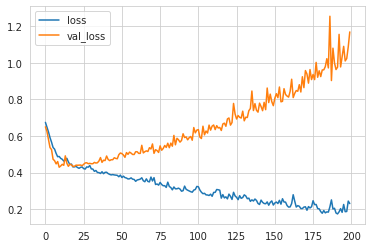

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=45,activation='relu'))
model.add(Dense(units=69,activation='elu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [19]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
19/19 [==============================] - 0s 15ms/step - loss: 0.6686 - val_loss: 0.6432
Epoch 2/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6460 - val_loss: 0.6249
Epoch 3/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6292 - val_loss: 0.5995
Epoch 4/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6054 - val_loss: 0.5670
Epoch 5/150
19/19 [==============================] - 0s 2ms/step - loss: 0.5809 - val_loss: 0.5345
Epoch 6/150
19/19 [==============================] - 0s 2ms/step - loss: 0.5589 - val_loss: 0.5021
Epoch 7/150
19/19 [==============================] - 0s 2ms/step - loss: 0.5342 - val_loss: 0.4733
Epoch 8/150
19/19 [==============================] - 0s 2ms/step - loss: 0.5109 - val_loss: 0.4780
Epoch 9/150
19/19 [==============================] - 0s 2ms/step - loss: 0.5061 - val_loss: 0.4420
Epoch 10/150
19/19 [==============================] - 0s 2ms/step - loss: 0.4809 - val_loss: 0.4548
Epoch 11

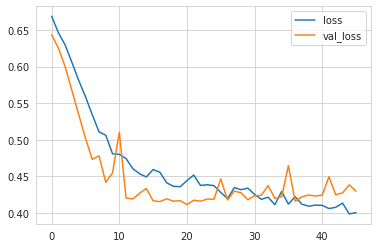

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [21]:

predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.74      0.67      0.70        58

    accuracy                           0.80       169
   macro avg       0.79      0.77      0.78       169
weighted avg       0.80      0.80      0.80       169



In [24]:
print(confusion_matrix(y_test,predictions))

[[97 14]
 [19 39]]
